In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt

### Functions used

In [2]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)

In [3]:
def getlink(url,x):
    lang = ["PowerPoint", "Forecasting", "SQL","Tableau", "Excel","Accounting","CPA", "SAS", "SAP",
           "Communication", 'Problem_Solving','Analytical_Skills','Outlook', "Critical_Thinking",
           "Salesforce", 'Teamwork']
    df2 = pd.DataFrame([], columns = lang)
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            sum_py = 0
            sum_pp = 0
            sum_fcast = 0
            sum_sql = 0
            sum_tableau = 0
            sum_ex = 0 
            sum_acc = 0
            sum_cpa = 0
            sum_sap = 0
            sum_sas = 0
            sum_com = 0
            sum_ps = 0 
            sum_ays = 0
            sum_out = 0 
            sum_ct = 0
            sum_qs = 0
            sum_tm = 0
            
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) 

            

            pp = re.findall(r'[\/\s\b]Power[Pp]oint[\/\b\s,]?', str(jd_desc))
            pp2 = count_in(pp)
            sum_pp = sum_pp + pp2

            fcast = re.findall(r'[\s\/\b]?[Ff]orecasting[\b\s\/,]', str(jd_desc))
            fcast2 = count_in(fcast)
            sum_fcast = sum_fcast + fcast2
            
            acc = re.findall(r'[\s\/\b]?[Aa]ccounting[\b\s\/,]', str(jd_desc))
            acc2 = count_in(acc)
            sum_acc = sum_acc + acc2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2

            cpa = re.findall(r'[\/\b]?CPA[\s\/,]?', str(jd_desc))
            cpa2 = count_in(cpa)
            sum_cpa = sum_cpa + cpa2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(jd_desc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            sap = re.findall(r'[\/\b]?SAP[\s\/,]?', str(jd_desc))
            sap2 = count_in(sap)
            sum_sap = sum_sap + sap2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(jd_desc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            com = re.findall(r'[\/\b]?[Cc]ommunication[\s\/,]?', str(jd_desc))
            com2 = count_in(com)
            sum_com = sum_com + com2
            
            ps = re.findall(r'[\/\b]?[Pp]roblem\s[Ss]olving[\s\/,]?', str(jd_desc))
            ps2 = count_in(ps)
            sum_ps = sum_ps + ps2
            
            ays = re.findall(r'[\/\b]?[Aa]nalytical\s[Ss]kills[\s\/,]?', str(jd_desc))
            ays2 = count_in(ays)
            sum_ays = sum_ays + ays2
            
            out = re.findall(r'[\/\b]?[Oo]utlook[\s\/,]?', str(jd_desc))
            out2 = count_in(out)
            sum_out = sum_out + out2
            
            ct = re.findall(r'[\/\b]?[Cc]ritical\s[Tt]hinking[\s\/,]?', str(jd_desc))
            ct2 = count_in(ct)
            sum_ct = sum_ct + ct2
            
            qs = re.findall(r'[\/\b]?[Ss]alesforce[\s\/,]?', str(jd_desc))
            qs2 = count_in(qs)
            sum_qs = sum_qs + qs2
            
            tm = re.findall(r'[\/\b]?[Tt]eamwork[\s\/,]?', str(jd_desc))
            tm2 = count_in(tm)
            sum_tm = sum_tm + tm2
            
    

            df = pd.DataFrame([[sum_pp,sum_fcast,sum_sql,sum_tableau,sum_ex ,sum_acc , sum_cpa,
            sum_sap ,sum_sas,sum_com,sum_ps,sum_ays,sum_out,sum_ct,sum_qs, sum_tm]], columns = lang)
            df2 = pd.concat([df,df2], axis =0)
            

        url_all = soup.findAll(attrs={'rel':['next']})
        print(url_all)

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'skills'}, inplace = True, axis = 1)
    t_job = len(df2)
    print('Total Jobs:', len(df2))
    return(df2, df4, t_job)

In [4]:
def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    fig = plt.figure(figsize = (16,8))
    sns.barplot(x='skills', y='Count', data=x).set_title(title,fontsize=20)
    plt.xticks(rotation=45, fontsize = 13)
    plt.xlabel('Skills',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Nationwide

In [5]:
nw, nw_count, nw_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager=",30)

[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=9" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=19" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=29" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=120" rel="next"/>]
[<link href="jobs?q=finance+manager%3D&amp;l=&amp;start=130" rel="next"/>]
[<link href="jobs?q=finance+manager

In [6]:
nw.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
356,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
358,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
360,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 361
               skills  Count
0          PowerPoint   41.0
1         Forecasting   69.0
2                 SQL    9.0
3             Tableau    2.0
4               Excel  250.0
5          Accounting  126.0
6                 CPA   16.0
7                 SAS   24.0
8                 SAP    5.0
9       Communication  241.0
10    Problem_Solving   40.0
11  Analytical_Skills   26.0
12            Outlook   16.0
13  Critical_Thinking   19.0
14         Salesforce    3.0
15           Teamwork   28.0


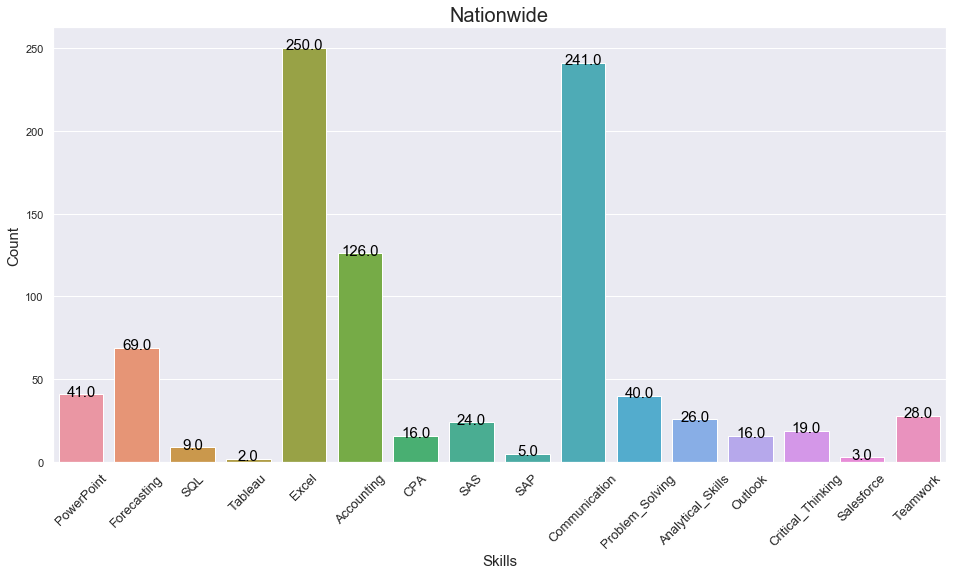

In [7]:
plot_count(nw_count, nw_total, 'Nationwide')

### DC

In [8]:
dc, dc_count, dc_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=Washington%2C+DC",30)

[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=8" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=18" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=59" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=69" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Washington%2C+DC&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=

In [9]:
dc.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
314,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
315,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
316,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
317,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 319
               skills  Count
0          PowerPoint   56.0
1         Forecasting   80.0
2                 SQL    6.0
3             Tableau    3.0
4               Excel  218.0
5          Accounting  188.0
6                 CPA   82.0
7                 SAS   12.0
8                 SAP    3.0
9       Communication  202.0
10    Problem_Solving   32.0
11  Analytical_Skills   15.0
12            Outlook   19.0
13  Critical_Thinking   19.0
14         Salesforce    4.0
15           Teamwork   21.0


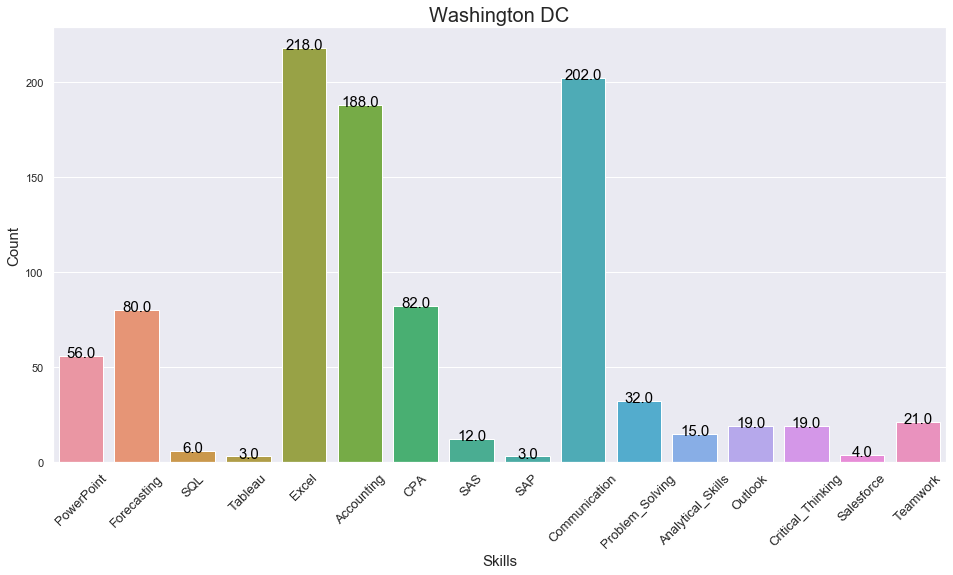

In [10]:
plot_count(dc_count, dc_total, 'Washington DC')

### New York City

In [11]:
ny, ny_count, ny_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=New+York",30)

[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+York&amp;start=120" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=New+Yor

In [12]:
ny.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
388,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Number of Jobs: 393
               skills  Count
0          PowerPoint   66.0
1         Forecasting   89.0
2                 SQL   17.0
3             Tableau   10.0
4               Excel  286.0
5          Accounting  204.0
6                 CPA   66.0
7                 SAS   31.0
8                 SAP    5.0
9       Communication  245.0
10    Problem_Solving   50.0
11  Analytical_Skills   40.0
12            Outlook   27.0
13  Critical_Thinking   13.0
14         Salesforce   17.0
15           Teamwork   16.0


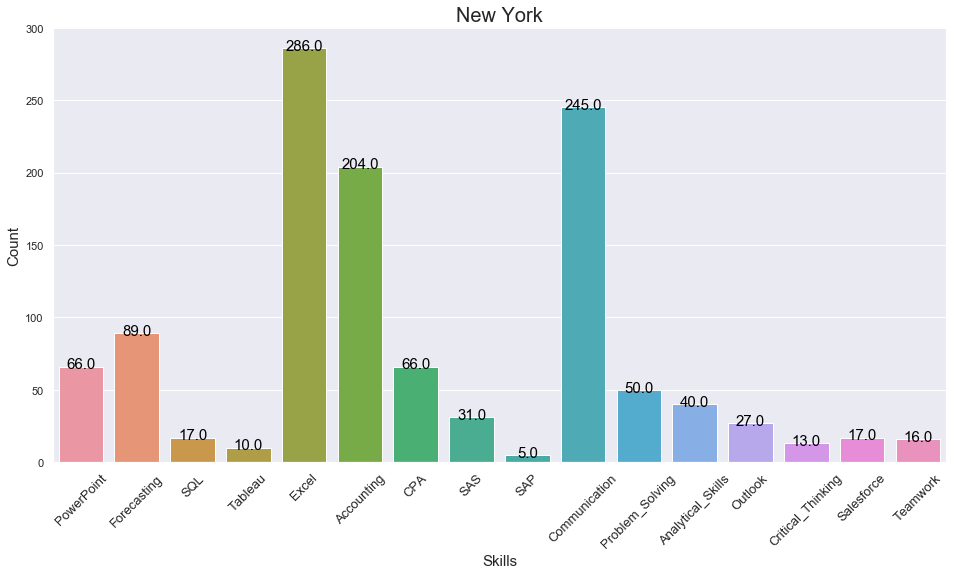

In [13]:
plot_count(ny_count, ny_total, 'New York')

### San Francisco

In [14]:
sf, sf_count, sf_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=San+Francisco",30)

[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=San+Francisco&amp;start=120" rel

In [15]:
sf.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
322,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
323,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1
326,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Number of Jobs: 327
               skills  Count
0          PowerPoint   51.0
1         Forecasting   99.0
2                 SQL   26.0
3             Tableau   15.0
4               Excel  229.0
5          Accounting  197.0
6                 CPA   88.0
7                 SAS   27.0
8                 SAP    2.0
9       Communication  208.0
10    Problem_Solving   33.0
11  Analytical_Skills   44.0
12            Outlook   15.0
13  Critical_Thinking   32.0
14         Salesforce   27.0
15           Teamwork   14.0


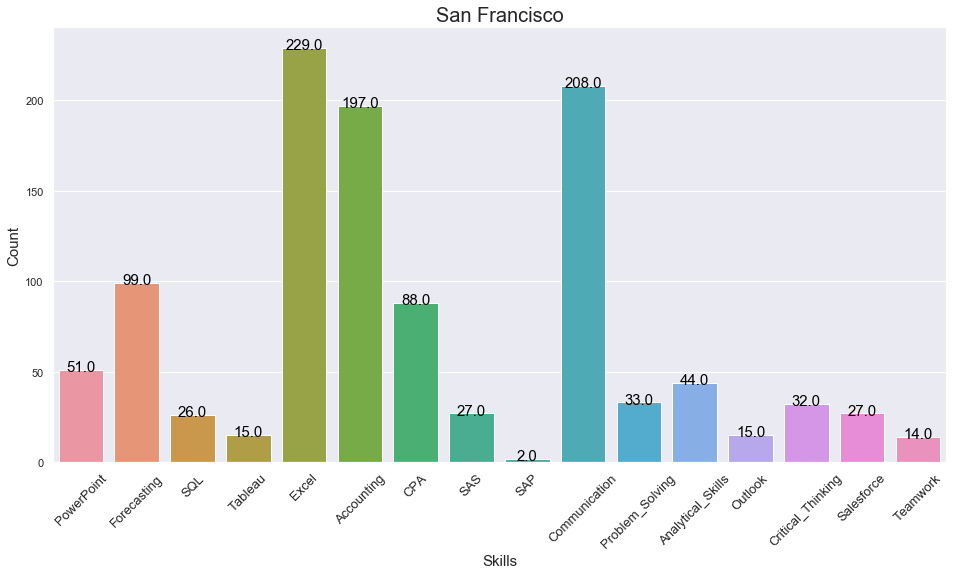

In [16]:
plot_count(sf_count, sf_total, 'San Francisco')

### Chicago

In [17]:
chi, chi_count, chi_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=Chicago",30) 

[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=100" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=110" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=120" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Chicago&amp;start=1

In [18]:
chi.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0
327,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
328,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 330
               skills  Count
0          PowerPoint   64.0
1         Forecasting   83.0
2                 SQL   13.0
3             Tableau   13.0
4               Excel  246.0
5          Accounting  201.0
6                 CPA   93.0
7                 SAS   49.0
8                 SAP    5.0
9       Communication  225.0
10    Problem_Solving   48.0
11  Analytical_Skills   44.0
12            Outlook    7.0
13  Critical_Thinking   13.0
14         Salesforce    7.0
15           Teamwork   26.0


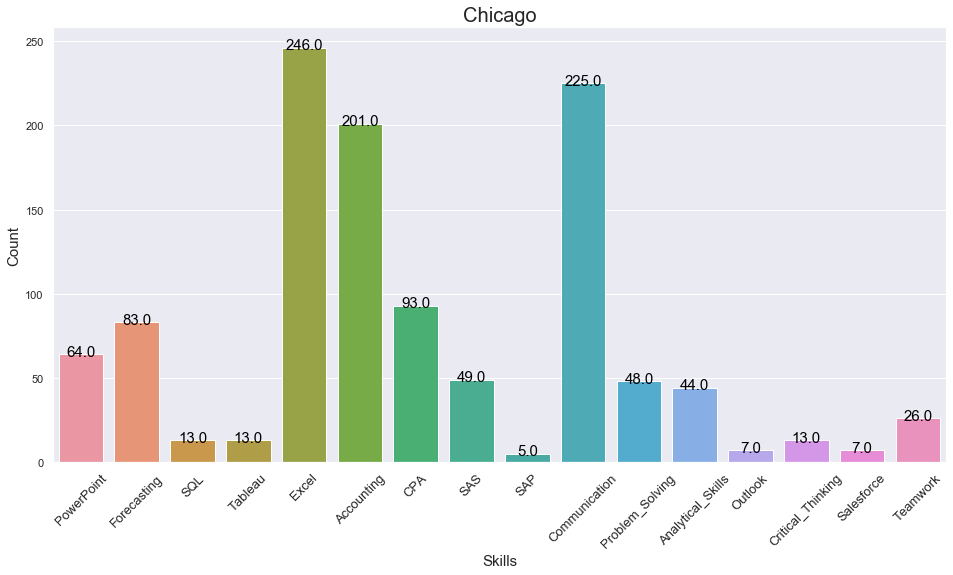

In [19]:
plot_count(chi_count, chi_total, 'Chicago')

### Philadelphia

In [22]:
ph, ph_count, ph_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=Philadelphia",10)

[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=78" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Philadelphia&amp;start=70" rel="next"/>]
Total Jobs: 117


In [23]:
ph.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
112,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
113,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
115,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
116,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0


Number of Jobs: 117
               skills  Count
0          PowerPoint   14.0
1         Forecasting   19.0
2                 SQL    3.0
3             Tableau    2.0
4               Excel   68.0
5          Accounting   57.0
6                 CPA   19.0
7                 SAS    5.0
8                 SAP    2.0
9       Communication   68.0
10    Problem_Solving   14.0
11  Analytical_Skills    6.0
12            Outlook    3.0
13  Critical_Thinking    5.0
14         Salesforce    4.0
15           Teamwork   11.0


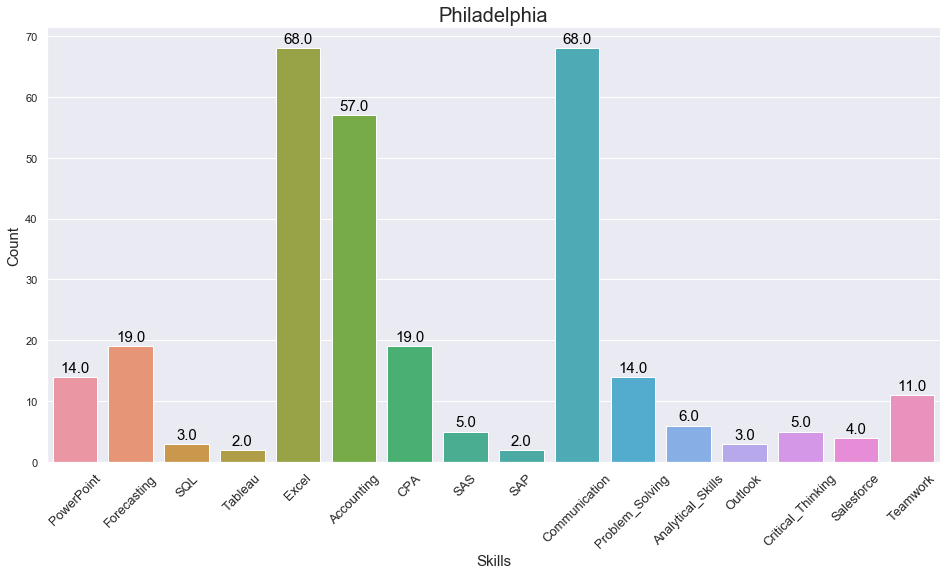

In [24]:
plot_count(ph_count, ph_total, 'Philadelphia')

### Houston 

In [26]:
hu, hu_count, hu_total = getlink("https://www.indeed.com/m/jobs?q=finance+manager&l=Houston",10)

[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=10" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=20" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=30" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=40" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=50" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=60" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=70" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=80" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=90" rel="next"/>]
[<link href="jobs?q=finance+manager&amp;l=Houston&amp;start=40" rel="next"/>]
Total Jobs: 131


In [27]:
hu.tail()

,PowerPoint,Forecasting,SQL,Tableau,Excel,Accounting,CPA,SAS,SAP,Communication,Problem_Solving,Analytical_Skills,Outlook,Critical_Thinking,Salesforce,Teamwork
126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0
130,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Number of Jobs: 131
               skills  Count
0          PowerPoint   13.0
1         Forecasting   25.0
2                 SQL    2.0
3             Tableau    6.0
4               Excel   84.0
5          Accounting   76.0
6                 CPA   33.0
7                 SAS   27.0
8                 SAP    0.0
9       Communication   74.0
10    Problem_Solving   16.0
11  Analytical_Skills   11.0
12            Outlook    4.0
13  Critical_Thinking    6.0
14         Salesforce    2.0
15           Teamwork   13.0


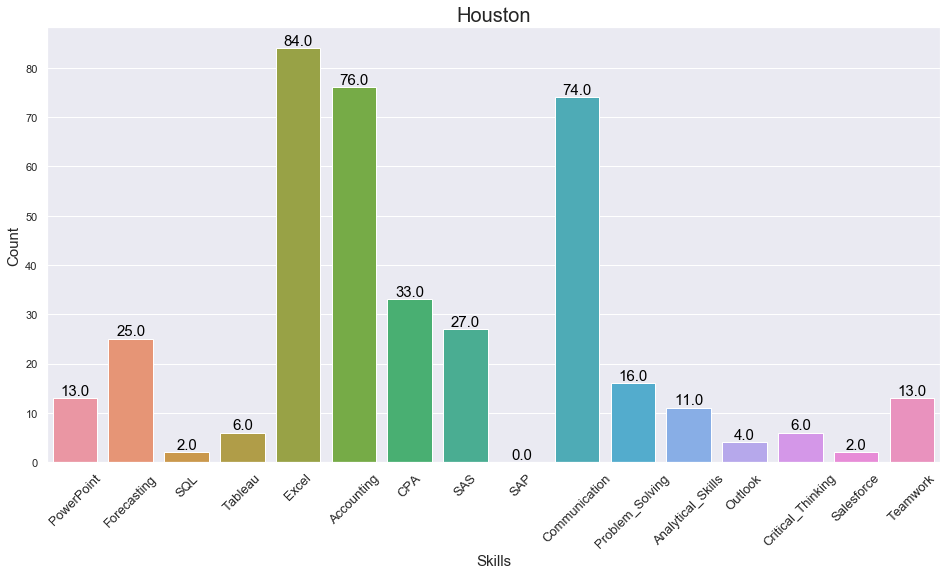

In [28]:
plot_count(hu_count, hu_total, 'Houston')

### All Cities

In [29]:
df_all = pd.concat([dc,ph,ny,sf, chi,hu], axis = 0)
df44 = df_all.sum(axis = 0)
df45 = pd.DataFrame(df44, columns = ['Count'])
df45.reset_index(inplace = True)
df45.rename({'index': 'skills'}, inplace = True, axis = 1)

Number of Jobs: 1617
               skills   Count
0          PowerPoint   264.0
1         Forecasting   395.0
2                 SQL    67.0
3             Tableau    49.0
4               Excel  1131.0
5          Accounting   923.0
6                 CPA   381.0
7                 SAS   151.0
8                 SAP    17.0
9       Communication  1022.0
10    Problem_Solving   193.0
11  Analytical_Skills   160.0
12            Outlook    75.0
13  Critical_Thinking    88.0
14         Salesforce    61.0
15           Teamwork   101.0


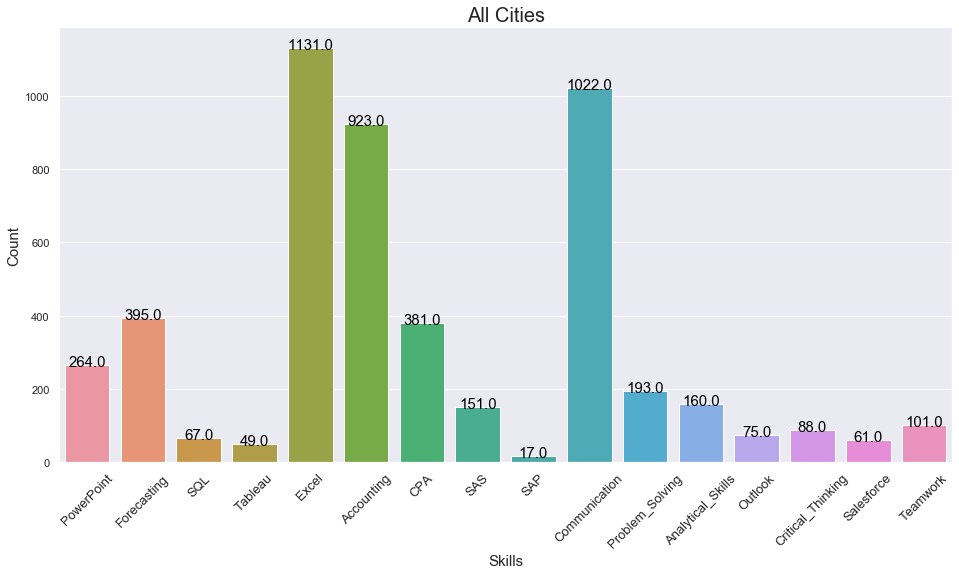

In [30]:
sns.set()
print('Number of Jobs:', len(df_all))
print(df45)
plt.figure(figsize = (16,8))
sns.barplot(x='skills', y='Count', data=df45).set_title('All Cities',fontsize=20)
plt.xticks(rotation=45, fontsize = 13)
plt.xlabel('Skills',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, height + 8,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Creat count dataframe for Tableau

In [33]:
#dc,ph,ny,sf, chi
dc_count['city'] = 'DC'
ph_count['city'] = 'Philadelphia'
ny_count['city'] = 'New York City'
sf_count['city'] = 'San Francisco'
chi_count['city'] = 'Chicago'
hu_count['city'] = 'Houston'
df_count = pd.concat([dc_count,ph_count,ny_count,sf_count, chi_count,hu_count], axis = 0)
df_count.reset_index(inplace =True)
df_count.drop('index', inplace =True, axis = 1)
df_count.to_csv('FM_results.csv')
df_count.tail()

,skills,Count,city
91,Analytical_Skills,11.0,Houston
92,Outlook,4.0,Houston
93,Critical_Thinking,6.0,Houston
94,Salesforce,2.0,Houston
95,Teamwork,13.0,Houston
